In [1]:
import datetime as dt
import numpy as np
from mtgoScraper import *

queryFormat = "pioneer"

if __name__ == "__main__":
    endDate = dt.datetime.today()
    startDate = endDate - dt.timedelta(weeks=1)

    startMonth = dt.datetime(startDate.year, startDate.month, 1)
    endMonth = dt.datetime(endDate.year, endDate.month, 1)
    months = pd.date_range(start=startMonth, end=endMonth, freq="MS")

    startDate = dt.date(startDate.year, startDate.month, startDate.day)

    rawDeckLists = []
    for month in months:
        monthList = mtgoScrape.formatDeckList(queryFormat, month.year, month.month)
        rawDeckLists += monthList

    skipUrls = []

    urlList = [
        x["url"]
        for x in rawDeckLists
        if x["url"] not in skipUrls
        if x["date"] >= startDate
    ]

    deckList = mtgoScrape.mtgoScrapeMain(urlList, queryFormat)

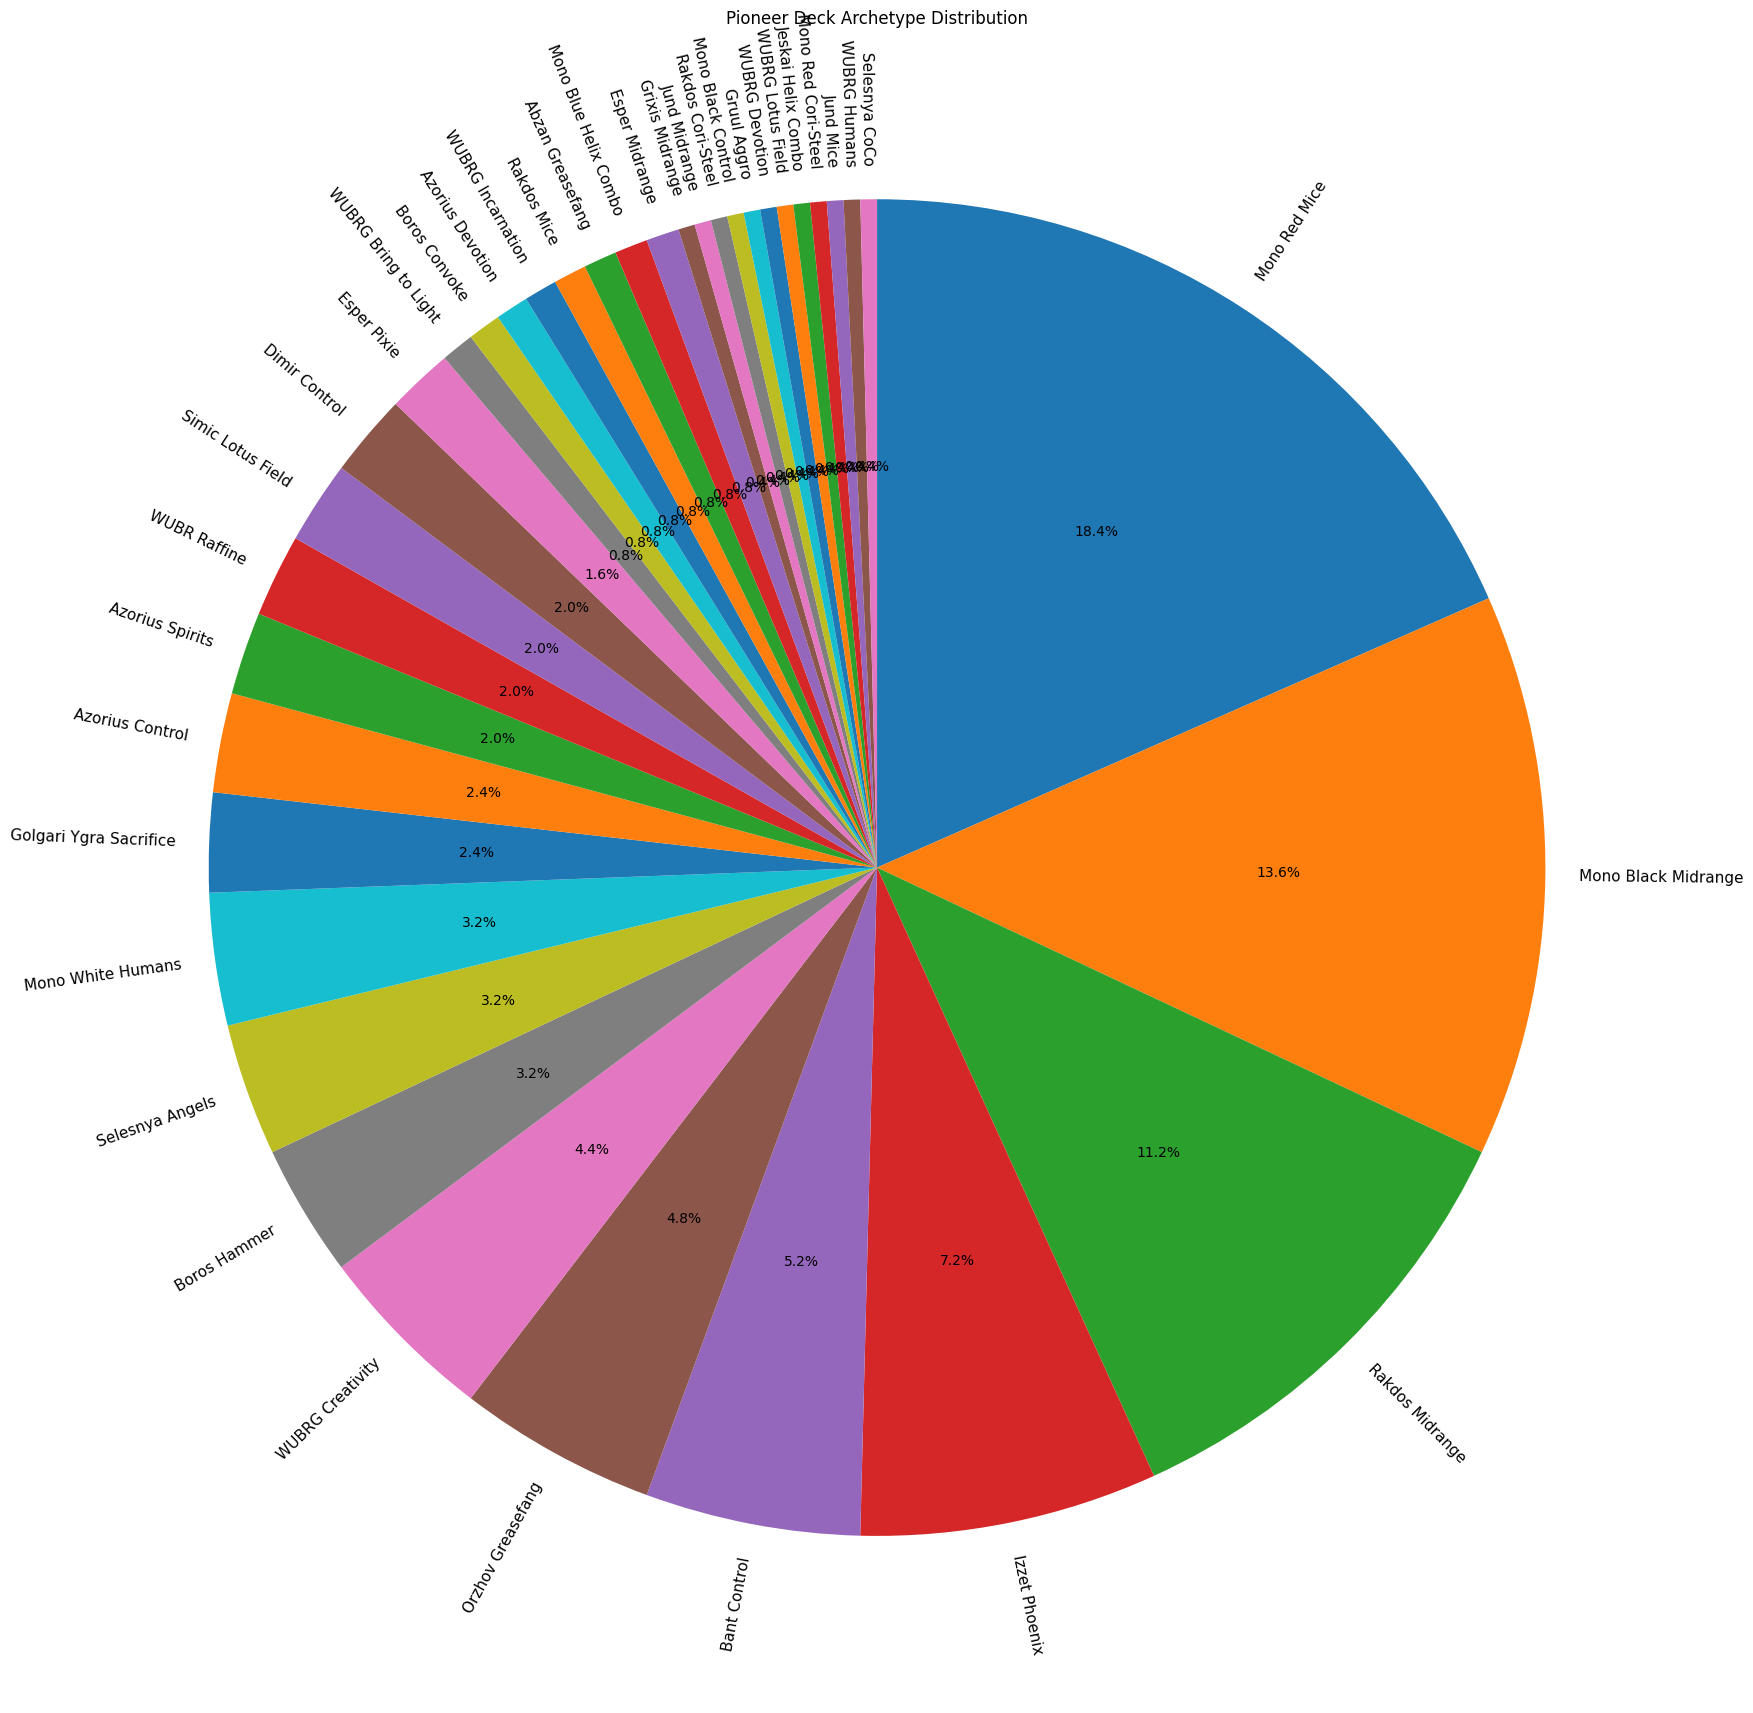

In [2]:
decks = [x.deckName for x in deckList]
deck_series = pd.Series(decks)
deck_counts = deck_series.value_counts()

# Create pie chart
fig, ax = plt.subplots(figsize=(18, 18))
wedges, _, _ = ax.pie(deck_counts, startangle=90, counterclock=False, autopct="%1.1f%%")

# Manually place labels at wedge centers
total = sum(deck_counts)
for i, wedge in enumerate(wedges):
    # Compute center angle of wedge
    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)

    # Position label slightly outside the wedge
    x = np.cos(angle_rad)
    y = np.sin(angle_rad)

    # Flip alignment and rotation for left side
    ha = "left" if x >= 0 else "right"
    rotation = angle if x >= 0 else angle + 180

    ax.text(
        x * 1.05,
        y * 1.05,
        deck_counts.index[i],
        ha=ha,
        va="center",
        rotation=rotation,
        rotation_mode="anchor",
        fontsize=11,
    )

plt.title(f"{queryFormat.title()} Deck Archetype Distribution")
plt.tight_layout()
plt.show()


In [3]:
keyCardNum = len([x.deckDf for x in deckList if x.keyCard == []])
print(f"{keyCardNum} deck(s) without any of the specified key cards")
show = keyCardNum
if keyCardNum > 0:
    i = 0
    x = [x for x in deckList if x.keyCard == []][i]
    print(f"{x.deckName}")
    show = x.deckDf[~x.deckDf["type_line"].str.contains("Land")]
show

5 deck(s) without any of the specified key cards
Mono Black Control


Main/Side  \
Deck URL                                          Deck                
/decklist/pioneer-challenge-32-2025-08-2612812726 Deck 28      Main   
                                                  Deck 28      Main   
                                                  Deck 28      Main   
                                                  Deck 28      Main   
                                                  Deck 28      Main   
                                                  Deck 28      Main   
                                                  Deck 28      Main   
                                                  Deck 28      Main   
                                                  Deck 28      Main   
                                                  Deck 28      Main   
                                                  Deck 28      Main   
                                                  Deck 28      Main   
                                                  Deck 28      Main   
                                                  Deck 28      Main   
                                                  Deck 28      Side   
                                                  Deck 28      Side   
                                                  Deck 28      Main   
                                                  Deck 28      Main   
                                                  Deck 28      Side   
                                                  Deck 28      Side   
                                                  Deck 28      Main   
                                                  Deck 28      Main   
                                                  Deck 28      Main   
                                                  Deck 28      Main   
                                                  Deck 28      Side   
                                                  Deck 28      Side   
                                                  Deck 28      Side   
                                                  Deck 28      Side   
                                                  Deck 28      Side   
                                                  Deck 28      Side   
                                                  Deck 28      Main   
                                                  Deck 28      Main   
                                                  Deck 28      Side   
                                                  Deck 28      Side   

                                                                           Card Name  \
Deck URL                                          Deck                                 
/decklist/pioneer-challenge-32-2025-08-2612812726 Deck 28             Dark Confidant   
                                                  Deck 28             Dark Confidant   
                                                  Deck 28         Cecil, Dark Knight   
                                                  Deck 28         Cecil, Dark Knight   
                                                  Deck 28      Gix, Yawgmoth Praetor   
                                                  Deck 28      Gix, Yawgmoth Praetor   
                                                  Deck 28                 Fatal Push   
                                                  Deck 28                 Fatal Push   
                                                  Deck 28          Go for the Throat   
                                                  Deck 28          Go for the Throat   
                                                  Deck 28            Deep-Cavern Bat   
                                                  Deck 28            Deep-Cavern Bat   
                                                  Deck 28               Thoughtseize   
                                                  Deck 28               Thoughtseize   
                                                  Deck 28               Unholy Annex   
     

In [4]:
# DataFrame showing the most common non-land cards in the format.
onOff = "off"
if onOff == "on":
    cardDf = (
        pd.concat([x.deckDf for x in deckList])
        .reset_index()
        .groupby("Card Name")["Quantity"]
        .sum()
        .reset_index()
    )
    cardDf = cardDf.sort_values(by="Quantity", ascending=False)
    cardDf = identifyDeck.enrichDataFrame(cardDf, oracle.expandedClean())
    cardDf[~cardDf["type_line"].str.contains("Land")]
    cardDf["Quantity"] = round(cardDf["Quantity"] / len(deckList), 2)
    cardDf

In [5]:
filteredDecks = [x.deckId for x in deckList if x.deckName == "Izzet Phoenix"]

In [6]:
includedCardList = ["Cori-Steel Cutter"]
excludedCardList = ["Cloud, Midgar Mercenary", "Arclight Phoenix"]
Queries.avgDecksWithCard(
    deckList, includedCardList, "Main", excludedCardList, "Main", "Main"
)

Card Name
Cori-Steel Cutter                 8.00
Snow-Covered Mountain             6.67
Experimental Synthesizer          5.33
Weapons Manufacturing             5.33
Shrapnel Blast                    4.67
Legion Extruder                   4.00
Clockwork Percussionist           2.67
Blood Crypt                       2.67
Burst Lightning                   2.67
Blazemire Verge                   2.67
Blackcleave Cliffs                2.67
Thornspire Verge                  2.67
Den of the Bugbear                2.67
Deadly Dispute                    2.67
Darksteel Citadel                 2.67
Copperline Gorge                  2.67
Kumano Faces Kakkazan             2.67
Fatal Push                        2.67
Emberheart Challenger             2.67
Questing Druid                    2.67
Monstrous Rage                    2.67
Oni-Cult Anvil                    2.67
Ornithopter                       2.67
Ravenous Intruder                 2.67
Mirrex                            2.67
Mishra's Resear

In [7]:
Queries.aggDecksWithCard(
    deckList, [], "Main", [], "Main", "Main"
)

Card Name
Mountain                      1396
Swamp                         1316
Mutavault                      862
Fatal Push                     800
Thoughtseize                   764
                              ... 
Zur, Eternal Schemer             2
Kenrith, the Returned King       2
Tolsimir, Friend to Wolves       2
Unclaimed Territory              2
Aclazotz, Deepest Betrayal       2
Name: Quantity, Length: 464, dtype: int64

In [8]:
Queries.avgArchetype(deckList, "Izzet Phoenix", "Main")

Main/Side  \
Deck URL                                          Deck               
/decklist/pioneer-challenge-32-2025-08-2612812726 Deck 5      Main   
                                                  Deck 5      Main   
                                                  Deck 5      Main   
                                                  Deck 5      Main   
                                                  Deck 5      Main   
...                                                            ...   
/decklist/pioneer-challenge-32-2025-08-3112812803 Deck 5      Main   
                                                  Deck 5      Main   
                                                  Deck 5      Main   
                                                  Deck 5      Main   
                                                  Deck 5      Main   

                                                                  Card Name  \
Deck URL                                          Deck                        
/decklist/pioneer-challenge-32-2025-08-2612812726 Deck 5   Arclight Phoenix   
                                                  Deck 5   Arclight Phoenix   
                                                  Deck 5    Artist's Talent   
                                                  Deck 5    Artist's Talent   
                                                  Deck 5           Consider   
...                                                                     ...   
/decklist/pioneer-challenge-32-2025-08-3112812803 Deck 5  Spikefield Hazard   
                                                  Deck 5    Torch the Tower   
                                                  Deck 5    Torch the Tower   
                                                  Deck 5  Stormcarved Coast   
                                                  Deck 5  Stormcarved Coast   

                                                          Quantity mana_cost  \
Deck URL                                          Deck                         
/decklist/pioneer-challenge-32-2025-08-2612812726 Deck 5         4    {3}{R}   
                                                  Deck 5         4    {3}{R}   
                                                  Deck 5         4    {1}{R}   
                                                  Deck 5         4    {1}{R}   
                                                  Deck 5         4       {U}   
...                                                            ...       ...   
/decklist/pioneer-challenge-32-2025-08-3112812803 Deck 5         1       {R}   
                                                  Deck 5         1       {R}   
                                                  Deck 5         1       {R}   
                                                  Deck 5         1             
                                                  Deck 5         1             

                                                                    type_line  \
Deck URL                                          Deck                          
/decklist/pioneer-challenge-32-2025-08-2612812726 Deck 5   Creature — Phoenix   
                                                  Deck 5   Creature — Phoenix   
                                                  Deck 5  Enchantment — Class   
                                                  Deck 5  Enchantment — Class   
                                                  Deck 5              Instant   
...                                                                       ...   
/decklist/pioneer-challenge-32-2025-08-3112812803 Deck 5              Instant   
                                                  Deck 5              Instant   
                                                  Deck 5              Instant   
                                                  Deck 5                 Land   
                                                  Deck 5                 Land   

                       